In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
data = pd.read_csv(r"C:\Users\Acer\Desktop\Project\Cognifyz_Technologies/dataset_cognifyz.csv")

In [8]:
data.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...          Currency Has Table booking  \
0  French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                    Japanese  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  

[2 rows x 21 columns]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [12]:
data.shape

(9551, 21)

In [14]:
##check the missing value in each colum
data.isnull()

Restaurant ID  Restaurant Name  Country Code   City  Address  Locality  \
0             False            False         False  False    False     False   
1             False            False         False  False    False     False   
2             False            False         False  False    False     False   
3             False            False         False  False    False     False   
4             False            False         False  False    False     False   
...             ...              ...           ...    ...      ...       ...   
9546          False            False         False  False    False     False   
9547          False            False         False  False    False     False   
9548          False            False         False  False    False     False   
9549          False            False         False  False    False     False   
9550          False            False         False  False    False     False   

      Locality Verbose  Longitude  Latitude  Cuisines  ...  Currency  \
0                False      False     False     False  ...     False   
1                False      False     False     False  ...     False   
2                False      False     False     False  ...     False   
3                False      False     False     False  ...     False   
4                False      False     False     False  ...     False   
...                ...        ...       ...       ...  ...       ...   
9546             False      False     False     False  ...     False   
9547             False      False     False     False  ...     False   
9548             False      False     False     False  ...     False   
9549             False      False     False     False  ...     False   
9550             False      False     False     False  ...     False   

      Has Table booking  Has Online delivery  Is delivering now  \
0                 False                False              False   
1                 False                False              False   
2                 False                False              False   
3                 False                False              False   
4                 False                False              False   
...                 ...                  ...                ...   
9546              False                False              False   
9547              False                False              False   
9548              False                False              False   
9549              False                False              False   
9550              False                False              False   

      Switch to order menu  Price range  Aggregate rating  Rating color  \
0                    False        False             False         False   
1                    False        False             False         False   
2                    False        False             False         False   
3                    False        False             False         False   
4                    False        False             False         False   
...                    ...          ...               ...           ...   
9546                 False        False             False         False   
9547                 False        False             False         False   
9548                 False        False             False         False   
9549                 False        False             False         False   
9550                 False        False             False         False   

      Rating text  Votes  
0           False  False  
1           False  False  
2           False  False  
3           False  False  
4           False  False  
...           ...    ...  
9546        False  False  
9547        False  False  
9548        False  False  
9549        False  False  
9550        False  False  

[9551 rows x 21 columns]

In [16]:
#checing how many have missing values in Cuisines
data[data['Cuisines'].isnull()]

Restaurant ID                 Restaurant Name  Country Code  \
84        17284105                   Cookie Shoppe           216   
87        17284211  Pearly's Famous Country Cookng           216   
94        17284158               Jimmie's Hot Dogs           216   
297       17374552                  Corkscrew Cafe           216   
328       17501439                        Dovetail           216   
346       17606621            HI Lite Bar & Lounge           216   
368       17059060                       Hillstone           216   
418       17142698                Leonard's Bakery           216   
455       17616465        Tybee Island Social Club           216   

               City                                          Address  \
84           Albany               115 N Jackson St, Albany, GA 31701   
87           Albany             814 N Slappey Blvd, Albany, GA 31701   
94           Albany               204 S Jackson St, Albany, GA 31701   
297     Gainesville                51 W Main St, Dahlonega, GA 30533   
328           Macon                   543 Cherry St, Macon, GA 31201   
346          Miller             109 N Broadway Ave, Miller, SD 57362   
368         Orlando  215 South Orlando Avenue, Winter Park, FL 32789   
418  Rest of Hawaii             933 Kapahulu Ave, Honolulu, HI 96816   
455        Savannah          1311 Butler Ave, Tybee Island, GA 31328   

         Locality         Locality Verbose   Longitude   Latitude Cuisines  \
84         Albany           Albany, Albany  -84.154000  31.577200      NaN   
87         Albany           Albany, Albany  -84.175900  31.588200      NaN   
94         Albany           Albany, Albany  -84.153400  31.575100      NaN   
297     Dahlonega   Dahlonega, Gainesville  -83.985800  34.531800      NaN   
328         Macon             Macon, Macon  -83.627979  32.836410      NaN   
346        Miller           Miller, Miller  -98.989100  44.515800      NaN   
368   Winter Park     Winter Park, Orlando  -81.365260  28.596682      NaN   
418       Kaimuki  Kaimuki, Rest of Hawaii -157.813432  21.284586      NaN   
455  Tybee Island   Tybee Island, Savannah  -80.848297  31.995810      NaN   

     ...   Currency Has Table booking Has Online delivery Is delivering now  \
84   ...  Dollar($)                No                  No                No   
87   ...  Dollar($)                No                  No                No   
94   ...  Dollar($)                No                  No                No   
297  ...  Dollar($)                No                  No                No   
328  ...  Dollar($)                No                  No                No   
346  ...  Dollar($)                No                  No                No   
368  ...  Dollar($)                No                  No                No   
418  ...  Dollar($)                No                  No                No   
455  ...  Dollar($)                No                  No                No   

    Switch to order menu Price range  Aggregate rating  Rating color  \
84                    No           1               3.4        Orange   
87                    No           1               3.4        Orange   
94                    No           1               3.9        Yellow   
297                   No           3               3.9        Yellow   
328                   No           3               3.8        Yellow   
346                   No           1               3.4        Orange   
368                   No           3               4.4         Green   
418                   No           1               4.7    Dark Green   
455                   No           1               3.9        Yellow   

    Rating text Votes  
84      Average    34  
87      Average    36  
94         Good   160  
297        Good   209  
328        Good   102  
346     Average    11  
368   Very Good  1158  
418   Excellent   707  
455        Good   309  

[9 rows x 21 columns]

In [18]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [20]:
# seperate categorical columsn and  numerical columns
categorical_cols=data.select_dtypes(include=['object']).columns
numerical_cols=data.select_dtypes(exclude=['object']).columns

In [22]:
print('cat:',categorical_cols)
print('num:',numerical_cols)

cat: Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')
num: Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


In [24]:
##fill the missing value with mode because it is categorical column
data['Cuisines']=data['Cuisines'].fillna(data['Cuisines'].mode()[0])

In [26]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Now we dont have any missing value will proceed to task

Level 2
Task 1:Analyze the distribution of aggregate ratings and determine the most common rating range.

In [32]:
# save the rating in one variable
rating=data['Aggregate rating'].head()
rating

0    4.8
1    4.5
2    4.4
3    4.9
4    4.8
Name: Aggregate rating, dtype: float64

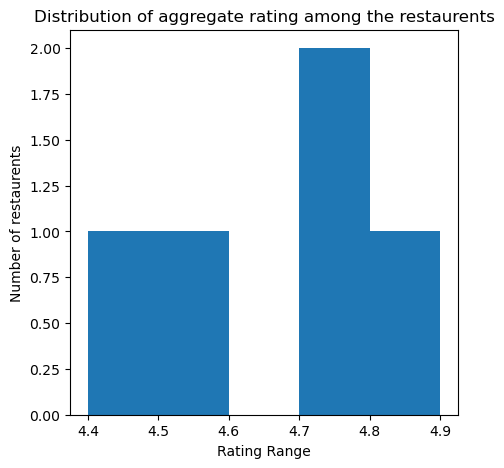

In [34]:
# Histogram of Aggregate rating among the restaurents
plt.figure(figsize=(5,5))
plt.hist(rating,bins=5)
plt.xlabel("Rating Range")
plt.ylabel("Number of restaurents")
plt.title('Distribution of aggregate rating among the restaurents')
plt.show()

In [36]:
rating_ranges=pd.cut(data['Aggregate rating'],bins=[0,1,2,3,4,5], labels=['0-1','1-2','2-3','3-4','4-5'])

In [38]:
rating_ranges.head()

0    4-5
1    4-5
2    4-5
3    4-5
4    4-5
Name: Aggregate rating, dtype: category
Categories (5, object): ['0-1' < '1-2' < '2-3' < '3-4' < '4-5']

Calculate the average number of votes received by restaurants

In [43]:
# Average votes received by the restaurent
avg_votes=data['Votes'].mean()
avg_votes

156.909747670401

Task:-2 Identify the most common combinations of cuisines in the dataset.

In [46]:
# value counts of Cuisines
data['Cuisines'].value_counts()

Cuisines
North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [48]:
# Cuisines 
data['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [50]:
# Combinations of cuisines in the dataset
import itertools

data['Cuisines'] = data['Cuisines'].str.split(',')
unique_combinations = []
for i in data['Cuisines']:
    unique_combinations.extend(set(combo) for combo in itertools.combinations(i, 2))
combination_counts = pd.Series(unique_combinations).value_counts()
print(combination_counts.head())

{North Indian,  Chinese}      1314
{North Indian,  Mughlai}       689
{ Mughlai,  Chinese}           323
{North Indian,  Fast Food}     296
{ Chinese,  North Indian}      268
Name: count, dtype: int64


Determine if certain cuisine combinations tend to have higher ratings.

In [53]:
data=data.dropna(subset=['Cuisines','Aggregate rating'])

In [57]:
data.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                         Cuisines  ...          Currency Has Table booking  \
0  [French,  Japanese,  Desserts]  ...  Botswana Pula(P)               Yes   
1                      [Japanese]  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  

[2 rows x 21 columns]

In [61]:
# save the cuisines in a variable
rat=data['Cuisines']
rat

0              [French,  Japanese,  Desserts]
1                                  [Japanese]
2       [Seafood,  Asian,  Filipino,  Indian]
3                          [Japanese,  Sushi]
4                         [Japanese,  Korean]
                        ...                  
9546                                [Turkish]
9547      [World Cuisine,  Patisserie,  Cafe]
9548                [Italian,  World Cuisine]
9549                        [Restaurant Cafe]
9550                                   [Cafe]
Name: Cuisines, Length: 9551, dtype: object

In [63]:
import pandas as pd

# Assuming 'idf' is your DataFrame
data['Cuisines'] = data['Cuisines'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Display the updated DataFrame
print(data['Cuisines'])

0              French,  Japanese,  Desserts
1                                  Japanese
2       Seafood,  Asian,  Filipino,  Indian
3                          Japanese,  Sushi
4                         Japanese,  Korean
                       ...                 
9546                                Turkish
9547      World Cuisine,  Patisserie,  Cafe
9548                Italian,  World Cuisine
9549                        Restaurant Cafe
9550                                   Cafe
Name: Cuisines, Length: 9551, dtype: object


In [65]:
avg_rating=data.groupby('Cuisines')['Aggregate rating'].mean()
avg_rating

Cuisines
Afghani                                         0.725
Afghani,  Mughlai,  Chinese                     0.000
Afghani,  North Indian                          0.000
Afghani,  North Indian,  Pakistani,  Arabian    0.000
African                                         4.700
                                                ...  
Western,  Asian,  Cafe                          4.200
Western,  Fusion,  Fast Food                    3.200
World Cuisine                                   4.900
World Cuisine,  Mexican,  Italian               4.400
World Cuisine,  Patisserie,  Cafe               4.200
Name: Aggregate rating, Length: 1825, dtype: float64

In [67]:
# Average rating in descending order
avg_rating=avg_rating.sort_values(ascending=False)
avg_rating

Cuisines
Italian,  Deli                      4.9
Hawaiian,  Seafood                  4.9
American,  Sandwich,  Tea           4.9
Continental,  Indian                4.9
European,  Asian,  Indian           4.9
                                   ... 
Fast Food,  Desserts,  Beverages    0.0
Fast Food,  Chinese,  Burger        0.0
Cafe,  French                       0.0
Seafood,  Mughlai,  North Indian    0.0
Fast Food,  Mughlai,  Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64

In [69]:
# Combination of Cuisines that have higher ratings
print('The Cuisines Combination that have higher ratings:')
print(avg_rating.head())

The Cuisines Combination that have higher ratings:
Cuisines
Italian,  Deli               4.9
Hawaiian,  Seafood           4.9
American,  Sandwich,  Tea    4.9
Continental,  Indian         4.9
European,  Asian,  Indian    4.9
Name: Aggregate rating, dtype: float64


TASK 3: Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [72]:
# import the packages
import plotly.express as px

In [76]:
# plot the restaurents on the map
fig = px.scatter_mapbox(
     data,
     lat='Latitude',
     lon='Longitude',
     hover_name='Restaurant Name',
     hover_data=['Cuisines'],
     color_discrete_sequence=['green'],
     zoom=5,
)

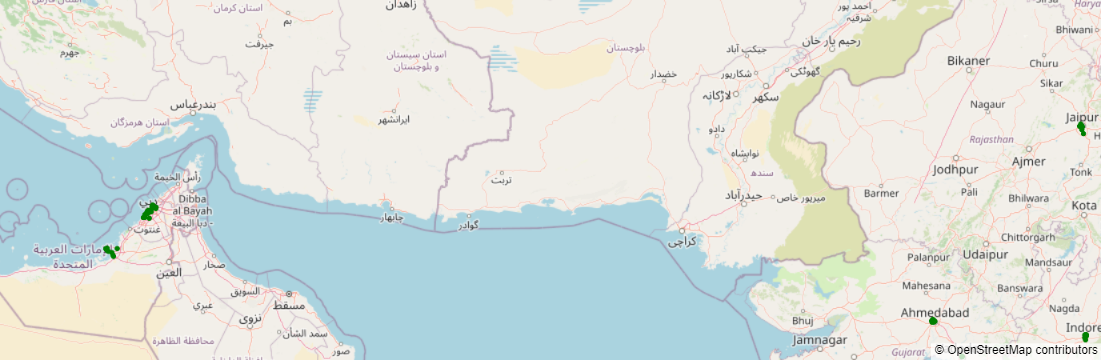

In [78]:
fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r": 0, "t": 0, "l": 0, "b":0},
)

Identify any patterns or clusters of restaurants in specific areas.

In [81]:
# import the package
from sklearn.cluster import KMeans

In [85]:
X=data[['Latitude','Longitude']]
num_cluster=5

In [87]:
# k mean clustering
kmeans=KMeans(n_clusters=num_cluster,n_init=10,random_state=42)
data['cluster']=kmeans.fit_predict(X)

In [89]:
# plot on the map
fig=px.scatter_mapbox(
    data,
    lat='Latitude',
    lon='Longitude',
    hover_name='Restaurant Name',
    hover_data=['Cuisines','Country Code'],
    color='cluster',
    color_continuous_scale='reds',
    zoom=5,
)

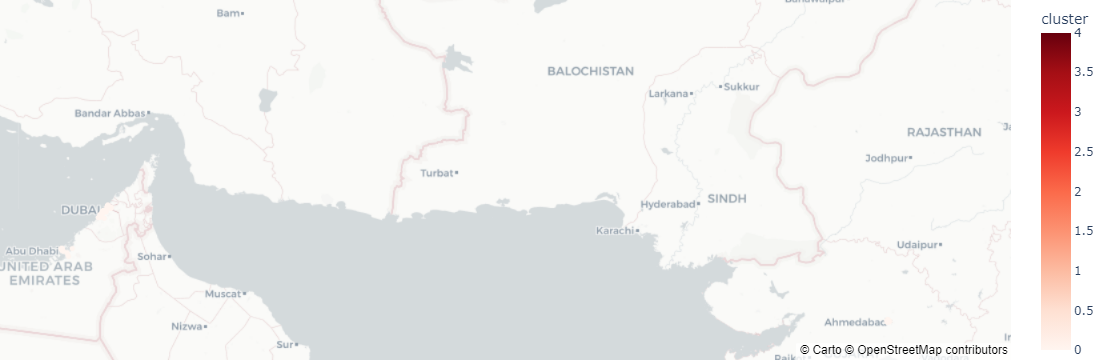

In [91]:
fig.update_layout(
    mapbox_style='carto-positron',
    margin={'r':0,"t":0,"l":0,'b':0}
)
fig.show()

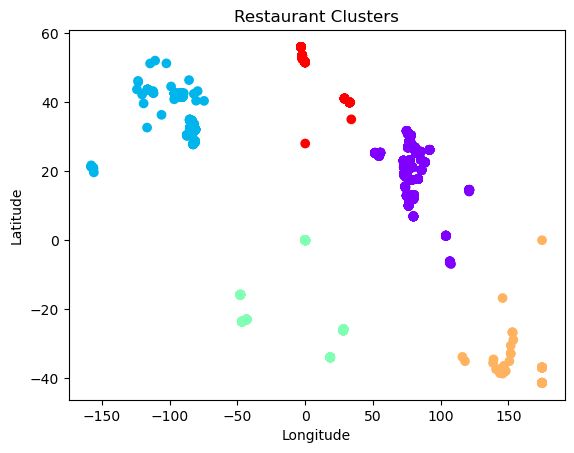

In [101]:
# clustering

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = data[['Latitude', 'Longitude']]

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Plotting the clusters
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='rainbow')
plt.title('Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [105]:
data.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                       Cuisines  ...  Has Online delivery Is delivering now  \
0  French,  Japanese,  Desserts  ...                   No                No   
1                      Japanese  ...                   No                No   

  Switch to order menu Price range Aggregate rating Rating color  Rating text  \
0                   No           3              4.8   Dark Green    Excellent   
1                   No           3              4.5   Dark Green    Excellent   

   Votes cluster Cluster  
0    314       0       0  
1    591       0       0  

[2 rows x 23 columns]

Task 4 : Identify if there are any restaurant chains present in the dataset.

In [107]:
res_count=data['Restaurant Name'].value_counts()

In [109]:
potential_chains=res_count[res_count > 1].index

In [111]:
print("Potential restaurant chains:")
for chain in potential_chains:
    print(f"-{chain}")

Potential restaurant chains:
-Cafe Coffee Day
-Domino's Pizza
-Subway
-Green Chick Chop
-McDonald's
-Keventers
-Pizza Hut
-Giani
-Baskin Robbins
-Barbeque Nation
-Giani's
-Barista
-Dunkin' Donuts
-Costa Coffee
-Pind Balluchi
-Wah Ji Wah
-Twenty Four Seven
-Pizza Hut Delivery
-Sagar Ratna
-Republic of Chicken
-KFC
-Starbucks
-Chaayos
-Burger King
-Haldiram's
-Shree Rathnam
-Frontier
-Moti Mahal Delux
-Bikanervala
-Aggarwal Sweets
-Behrouz Biryani
-Karim's
-Bikaner Sweets
-Chicago Pizza
-Apni Rasoi
-34, Chowringhee Lane
-Wow! Momo
-Madras Cafe
-Burger Point
-Gopala
-Shama Chicken Corner
-Berco's
-Nirula's Ice Cream
-Sardar A Pure Meat Shop
-Yo! China
-Cocoberry
-Punjabi Tadka
-Angels in my Kitchen
-Faasos
-Ovenstory Pizza
-Chowringhee
-Punjabi Chaap Corner
-Kebab Xpress
-Nazeer Foods
-RollsKing
-Tpot
-Mocha
-Dolce Gelato
-Tibb's Frankie
-The Yellow Chilli
-Slice of Italy
-BTW
-Khan Chacha
-Chawla's�_
-China Town
-Chinese Hut
-Sanjha Chulha
-Moti Mahal Delux Tandoori Trail
-Mr. Sub
-Al Ba

In [113]:
data=data[data['Aggregate rating'].notnull()]

In [117]:
chain_stats=data.groupby('Restaurant Name').agg({
    'Aggregate rating':'mean',
    'Votes':'sum',
    'Cuisines':'count'
}).reset_index()

In [127]:
#Analyze the ratings and popularity of different restaurant chains.
chain_stats.columns=['Restaurant Name','Average rating','Total Votes','Number of Location']

In [121]:
chain_stats=chain_stats.sort_values(by='Total Votes',ascending=False)

In [123]:
print("Restaurant Chain Rating and Popularity Analysis (Sorted by Total Votes):")
print(chain_stats.to_string(index=False,justify='center'))

Restaurant Chain Rating and Popularity Analysis (Sorted by Total Votes):
                   Restaurant Name                      Average rating  Total Votes  Number of Location
                                       Barbeque Nation     4.353846       28142              26        
                             AB's - Absolute Barbecues     4.825000       13400               4        
                                                  Toit     4.800000       10934               1        
                                             Big Chill     4.475000       10853               4        
                                            Farzi Cafe     4.366667       10098               6        
                                              Truffles     3.950000        9682               2        
                                               Chili's     4.580000        8156               5        
                                      Hauz Khas Social     4.300000        7931               1